## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df3= pd.merge(mouse_metadata,study_results)
# Display the data table for preview
df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice.
mice= df3["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [30]:
#Truncated info for Mouse ID column
df3.loc[:,"Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [31]:
 #Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
DMD= df3[df3.duplicated(['Mouse ID', 'Timepoint'])]
#DMD = Duplicate Mouse Data
DMD

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
DMD=df3[df3.duplicated(['Mouse ID',])]
DMD


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

klean_df = DMD.drop_duplicates("Mouse ID")
klean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1874,z795,Naftisol,Female,13,29,5,46.833475,0


In [34]:
# Checking the number of mice in the clean DataFrame.
len(klean_df)

237

### Check if Clean and free of erroneous information
klean_df.count()


In [35]:
 #Summary Statistics
regimen_mean = klean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = klean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = klean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = klean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = klean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem 


Drug Regimen
Capomulin    0.448593
Ceftamin     0.164505
Infubinol    0.477067
Ketapril     0.264819
Naftisol     0.202385
Placebo      0.218091
Propriva     0.248545
Ramicane     0.482955
Stelasyn     0.254830
Zoniferol    0.188950
Name: Tumor Volume (mm3), dtype: float64

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: _group_by = klean_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
sumstats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
sumstats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593
Ceftamin,46.503051,46.370798,0.568299,0.753856,0.164505
Infubinol,46.541247,46.870483,5.689821,2.385335,0.477067
Ketapril,47.389175,47.059664,1.612964,1.270025,0.264819
Naftisol,46.796098,46.621301,0.942076,0.970606,0.202385
Placebo,47.125589,46.989764,1.141526,1.068422,0.218091
Propriva,47.077791,46.847642,1.482589,1.217616,0.248545
Ramicane,43.944859,45.521875,5.831150,2.414777,0.482955
Stelasyn,47.470830,47.054185,1.493585,1.222123,0.254830


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#Groupby drug regimen with .count and mouse id to determine the datapoints
Drugreg_data_points = klean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
Drugreg_data_points

Drug Regimen
Capomulin    25
Ceftamin     21
Infubinol    25
Ketapril     23
Naftisol     23
Placebo      24
Propriva     24
Ramicane     25
Stelasyn     23
Zoniferol    24
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

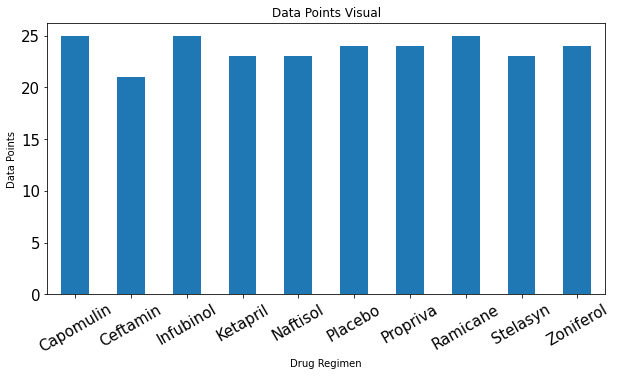

<Figure size 432x288 with 0 Axes>

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drugreg_data_points.plot(kind="bar",figsize=(10,5),fontsize = 15)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks (rotation=30)

#Alter the dataframe down to two columns
plt.show()
plt.tight_layout()

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Medication_list =  summary_df.index.tolist()
Medication_list


NameError: name 'summary_df' is not defined

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

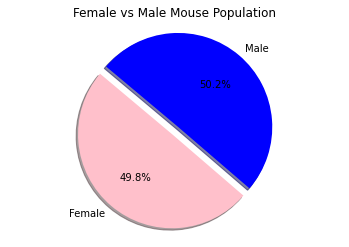

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Female","Male"]
plt.title('Female vs Male Mouse Population')
#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

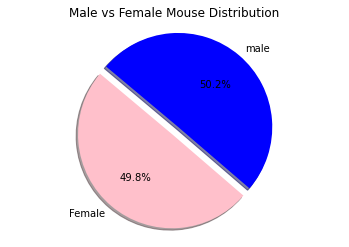

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","male"]
plt.title('Male vs Female Mouse Distribution')
#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimes = klean_df[klean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimes =klean_df.sort_values(["Timepoint"], ascending=True)
treatment_regimes

treatment_regimes_data = klean_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

treatment_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1,Ramicane,k403,5,38.825898
11,Capomulin,s185,5,43.878496
21,Capomulin,x401,5,45.473753
31,Capomulin,m601,5,41.408591
41,Ramicane,g791,5,45.851531
...,...,...,...,...
1859,Stelasyn,z314,5,45.934712
1861,Propriva,z435,5,47.115980
1864,Infubinol,z581,5,49.273092
1874,Naftisol,z795,5,46.833475


In [39]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_df = klean_df.loc[klean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = klean_df.loc[ klean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = klean_df.loc[ klean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = klean_df.loc[ klean_df["Drug Regimen"] == "Ceftamin", :]
    # Locate the rows which contain mice on each drug and get the tumor volumes
#mice_rows =klean_df.loc[klean_df]["Mouse ID"]
    
    # add subset 
    
    
    
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol,  klean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,5,Capomulin,Female,9,22,45.651331,0
1,b742,5,Capomulin,Male,7,21,41.534097,0
2,f966,5,Capomulin,Male,16,17,38.796474,0
3,g288,5,Capomulin,Male,3,19,45.839400,0
4,g316,5,Capomulin,Female,22,22,44.022752,0
5,i557,5,Capomulin,Female,1,24,42.261665,0
6,i738,5,Capomulin,Female,23,20,45.595685,0
7,j119,5,Capomulin,Female,7,23,45.838998,0
8,j246,5,Capomulin,Female,21,21,45.641438,0
9,l509,5,Capomulin,Male,17,21,45.851193,0


In [40]:
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 43.180977399999996
The upper quartile of Capomulin tumors: 45.76088647
The interquartile range of Capomulin tumors: 2.5799090700000065
The median of Capomulin tumors: 45.59706359 
Values below 39.31111379499998 could be outliers.
Values above 49.63075007500001 could be outliers.


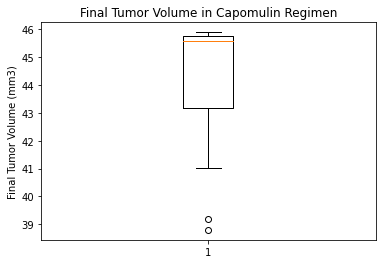

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(Capomulin_tumors)
plt.show()

## Line and Scatter Plots

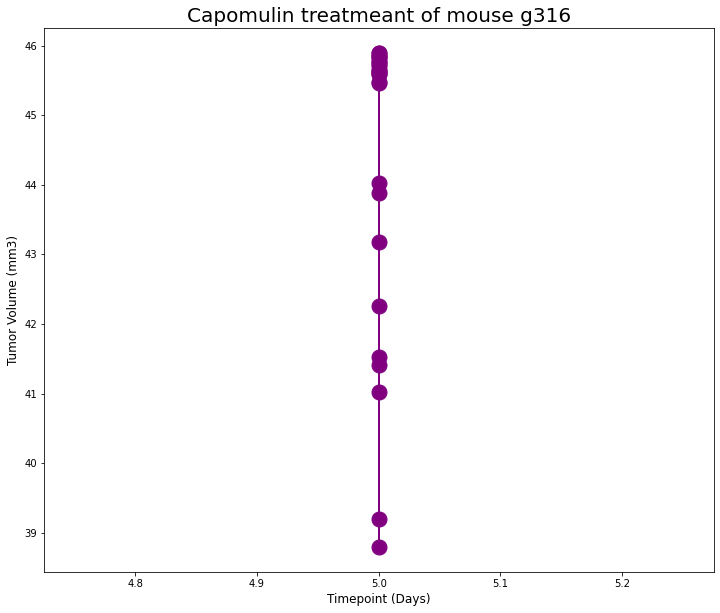

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = Capomulin_merge["Timepoint"]
tumsiz = Capomulin_merge["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 10))
plt.title('Capomulin treatmeant of mouse g316',fontsize =20)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="purple", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_vs_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

weight_vs_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.651331
1,b742,21,41.534097
2,f966,17,38.796474
3,g288,19,45.839400
4,g316,22,44.022752


In [84]:
#rename df
avg_df = weight_vs_df.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_df.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,45.651331
1,b742,21,41.534097
2,f966,17,38.796474
3,g288,19,45.839400
4,g316,22,44.022752


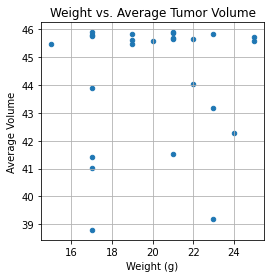

In [85]:
avg_df.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_df.iloc[:,0]
avg_tumor_volume = avg_df.iloc[:,1]



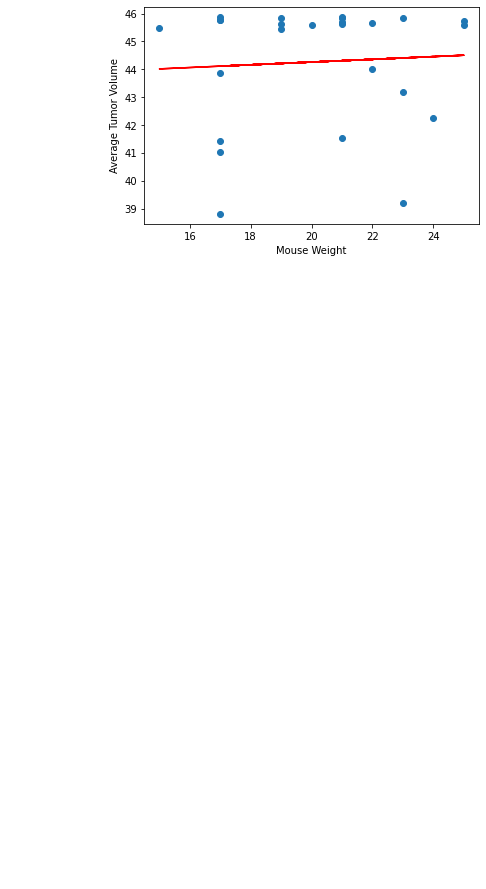

In [105]:
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = weight_vs_df["Weight (g)"]
y_values = avg_df["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=25,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()